# ImageDataGeneratorを用いたデータ拡張
https://keras.io/preprocessing/image/

In [1]:
import numpy as np
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
import os
import shutil
import glob
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm


Using TensorFlow backend.


## numpy形式の画像を拡張する場合

In [2]:
# 画像読み込み
data = np.load("/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/1_data/train_data.npy")  # パスは適宜変更すること
label = np.load("/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/1_data/train_label.npy")  # パスは適宜変更すること

dir_list = glob.glob("/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/2_notebook/output_*")
 
for rdir in dir_list:
    shutil.rmtree(rdir)

    
# 文字種毎にデータ抽出、データ拡張
for i in range(15):
    index = np.where(label[:, i] == 1)
    data_c = data[index[0]]
    
    # 軸をN,H,W,Cに入れ替え
    data_c = data_c.transpose(0,2,3,1)


    # ImageDataGeneratorのオブジェクト生成
    datagen = ImageDataGenerator(
            shear_range=0.2,
            zoom_range=0.2,
            rotation_range=15)

    # 生成後枚数
    num_image = 4000
    
    save_path = "/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/2_notebook/output_%s/"%i
    os.mkdir(save_path)
    
    # 生成
    g = datagen.flow(data_c, batch_size=1, save_to_dir=save_path, save_format='png', save_prefix='out_a_from_npy_')
    for k in range(num_image):
        batches = g.next()
        

# 拡張後の画像ファイルを配列に変換

In [3]:

IMG_SIZE=28
COLOR=True
SAVE_FILE_NAME='SaveImages'
SAVE_FILE_NAME=SAVE_FILE_NAME+'_'+str(IMG_SIZE)+'Gray'

merge_array = np.empty([0,28,28,1])    

for l in range(15):
    
    #読み込みディレクトリ名
    DIR_NAME='./output_%s'%l
    
    #読み込みファイル名のリスト
    img_list=glob.glob(DIR_NAME+'/*.png')
    temp_img_array_list=[]
    #画像を読み込み、アレイ型に変換
    for img in tqdm(img_list):
        temp_img=load_img(img,grayscale=COLOR,target_size=(IMG_SIZE,IMG_SIZE))
        temp_img_array=img_to_array(temp_img)
        temp_img_array_list.append(temp_img_array)
    temp_img_array_list=np.array(temp_img_array_list)
    
    print(temp_img_array_list.shape)

    merge_array = np.concatenate([merge_array, temp_img_array_list])
    
print(merge_array.shape)

# 軸をN,C,H,Wに入れ替え
merge_array = merge_array.transpose(0,3,1,2)
# npyファイルとして保存
np.save("train_data_mr.npy",merge_array)

  0%|          | 0/3997 [00:00<?, ?it/s]/Users/hiranot/anaconda3/lib/python3.7/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
  3%|▎         | 111/3994 [00:00<00:03, 1107.63it/s]

(3997, 28, 28, 1)


  0%|          | 0/3996 [00:00<?, ?it/s]

(3994, 28, 28, 1)


  0%|          | 0/3999 [00:00<?, ?it/s]

(3996, 28, 28, 1)


  0%|          | 0/3997 [00:00<?, ?it/s]

(3999, 28, 28, 1)


  0%|          | 0/3996 [00:00<?, ?it/s]

(3997, 28, 28, 1)


100%|██████████| 3996/3996 [00:02<00:00, 1356.25it/s]


(3996, 28, 28, 1)


  0%|          | 0/3996 [00:00<?, ?it/s]

(3997, 28, 28, 1)


100%|██████████| 3996/3996 [00:02<00:00, 1345.44it/s]


(3996, 28, 28, 1)


100%|██████████| 3997/3997 [00:02<00:00, 1374.56it/s]


(3997, 28, 28, 1)


100%|██████████| 3997/3997 [00:02<00:00, 1343.00it/s]


(3997, 28, 28, 1)


100%|██████████| 3997/3997 [00:02<00:00, 1423.34it/s]


(3997, 28, 28, 1)


100%|██████████| 3997/3997 [00:02<00:00, 1348.75it/s]


(3997, 28, 28, 1)


100%|██████████| 3993/3993 [00:02<00:00, 1399.58it/s]


(3993, 28, 28, 1)


100%|██████████| 3996/3996 [00:02<00:00, 1386.45it/s]


(3996, 28, 28, 1)


100%|██████████| 3997/3997 [00:02<00:00, 1435.83it/s]


(3997, 28, 28, 1)
(59946, 28, 28, 1)


# アレイ型ファイルから画像データを読み込み、表示

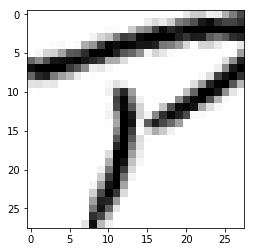

In [6]:
tmp_data = np.load("./train_data_mr.npy")
#tmp_data = tmp_data.transpose(0,3,1,2)

ind = 0

# 画像
img = tmp_data[ind,:,:,:,]
plt.imshow(img[0,:,:], cmap='gray')
plt.show()


# 正解ラベル作成

In [7]:
label_count = []

for i in range(15):
    path = "/Users/hiranot/SkillUpAI_DL/DAY1_vr5_0_0/4_kadai/2_notebook/output_%s"%i
    files = os.listdir(path)  
    count = len(files)
    label_count.append(count)

# 各ラベル作成
char_01=np.array([1,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
char_02=np.array([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0])
char_03=np.array([0,0,1,0,0,0,0,0,0,0,0,0,0,0,0])
char_04=np.array([0,0,0,1,0,0,0,0,0,0,0,0,0,0,0])
char_05=np.array([0,0,0,0,1,0,0,0,0,0,0,0,0,0,0])
char_06=np.array([0,0,0,0,0,1,0,0,0,0,0,0,0,0,0])
char_07=np.array([0,0,0,0,0,0,1,0,0,0,0,0,0,0,0])
char_08=np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,0,0])
char_09=np.array([0,0,0,0,0,0,0,0,1,0,0,0,0,0,0])
char_10=np.array([0,0,0,0,0,0,0,0,0,1,0,0,0,0,0])
char_11=np.array([0,0,0,0,0,0,0,0,0,0,1,0,0,0,0])
char_12=np.array([0,0,0,0,0,0,0,0,0,0,0,1,0,0,0])
char_13=np.array([0,0,0,0,0,0,0,0,0,0,0,0,1,0,0])
char_14=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1,0])
char_15=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,1])
                         
for i in range(15):
    if i == 0:
        array_01 = np.tile(char_01,(label_count[i],1))
    if i == 1:
        array_02 = np.tile(char_02,(label_count[i],1))
    if i == 2:
        array_03 = np.tile(char_03,(label_count[i],1))
    if i == 3:
        array_04 = np.tile(char_04,(label_count[i],1))
    if i == 4:
        array_05 = np.tile(char_05,(label_count[i],1))
    if i == 5:
        array_06 = np.tile(char_06,(label_count[i],1))
    if i == 6:
        array_07 = np.tile(char_07,(label_count[i],1))
    if i == 7:
        array_08 = np.tile(char_08,(label_count[i],1))
    if i == 8:
        array_09 = np.tile(char_09,(label_count[i],1))
    if i == 9:
        array_10 = np.tile(char_10,(label_count[i],1))
    if i == 10:
        array_11 = np.tile(char_11,(label_count[i],1))
    if i == 11:
        array_12 = np.tile(char_12,(label_count[i],1))
    if i == 12:
        array_13 = np.tile(char_13,(label_count[i],1))
    if i == 13:
        array_14 = np.tile(char_14,(label_count[i],1))
    if i == 14:
        array_15 = np.tile(char_15,(label_count[i],1))

label_data_mr = np.concatenate([array_01, array_02, array_03, array_04, array_05, array_06, array_07, array_08, array_09, array_10, array_11, array_12, array_13, array_14, array_15])

np.save("train_label_mr.npy",label_data_mr)
